## Import Libraries

In [52]:
# Importing Libraries 

from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Drew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Drew\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Drew\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

In [53]:
myfile=open('20th_century_Events_Wiki.txt',encoding='utf-8')

In [54]:
# Importing text file of twentieth-century data scraped 

with open ('20th_century_Events_Wiki.txt','r',errors='ignore') as file:
    data=file.read().replace('\n','')

In [55]:
# Sentence Tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent=sent_tokenize(data)
print(tokenized_sent[:20])

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchDonateAppearanceCreate accountLog inPersonal tools Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1World at the beginning of the century1.1.1"The war to end all wars": World War I (1914â€“1918)1.1.2Russian Revolution and communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939â€“1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.11The 

In [56]:
# Word Tokenization of 20th Century Text File

from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(data)
print(tokenized_word[:50])

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchDonateAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in']


In [57]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words=FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4810 samples and 20973 outcomes>


In [58]:
# Finding the 10 most common words

dist_words.most_common(10)

[('.', 1273),
 ('the', 1095),
 (',', 965),
 ('of', 603),
 ('and', 398),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('The', 300),
 ('in', 290)]

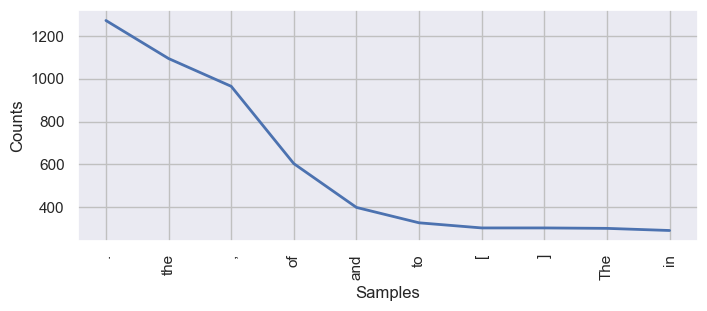

In [59]:
# Creating frequency distribution plot of the 10 most common words

plt.figure(figsize=(8,3))
dist_words.plot(10,cumulative=False)
plt.show()

## Stopwords

In [60]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'yourself', 'ours', 've', 'ma', 'but', "haven't", 'my', 'again', 'has', 'don', 'while', 'they', 'll', 'needn', 'isn', 'does', 'had', "wasn't", 'why', 'he', 'myself', 'didn', 'own', 'doing', 'these', 'because', 'won', 'over', 'into', 'their', 'how', 'hasn', 'were', 'here', 'very', 'can', "you'll", 'wasn', 'for', 'mustn', 'being', 'a', 'haven', 'himself', 'him', 'on', 'where', 'those', 'what', 'will', 'nor', 'before', "hasn't", "weren't", 'mightn', 's', 'hers', "couldn't", 'under', 'each', 'couldn', "you're", 'same', 'down', 'so', 'themselves', 'do', 'shouldn', 'is', 'doesn', 'few', 'such', 'shan', 'if', 'have', 'all', 'its', 'our', 'against', "mightn't", 'in', 'ourselves', 'aren', 'of', 'further', 'weren', "it's", 'having', 'with', 'which', 'or', 'after', 'any', 'she', 'was', 'to', "you've", "don't", 'are', 'off', 'itself', 're', "wouldn't", 'theirs', "mustn't", 'then', 'more', 'just', 'the', 'both', 'be', 'not', 'at', 'than', "shan't", 'as', "didn't", 'and', 'there', "won't", "she's",

In [61]:
# Removing stopwords in words

filtered_words=[]
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [62]:
filtered_words[:20]

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity']

In [63]:
# Creating new FreqDist for filtered_words

dist_words_filter=FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4707 samples and 16317 outcomes>


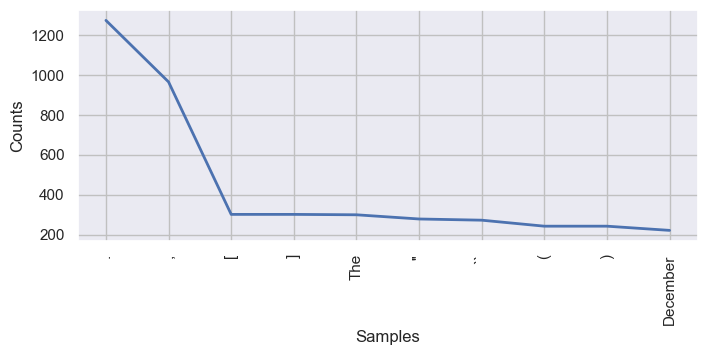

In [64]:
# Plotting new frequency distribution plot

plt.figure(figsize=(8,3))
dist_words_filter.plot(10,cumulative=False)
plt.show()

In [65]:
dist_words_filter

FreqDist({'.': 1273, ',': 965, '[': 302, ']': 302, 'The': 300, "''": 279, '``': 273, '(': 243, ')': 243, 'December': 222, ...})

In [66]:
# Substitute punctuation marks with a space

sans_punc=re.sub("[^a-zA-Z]",
                 " ",
                 str(filtered_words))

In [67]:
sans_punc[:1000]

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchDonateAppearanceCreate    accountLog    inPersonal    tools    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Historic    events      th    centuryToggle    Historic    events      th    century    subsection   World    beginning    century               The    war    end    wars               World    War    I                                          Russian    Revolution    communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                          The    war    Europe     Blitzkrieg     Operation

In [68]:
# Word tokenization of substituted filtered words

tokenized_word_2=word_tokenize(sans_punc)
print(tokenized_word_2[:100])

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchDonateAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Japanese

In [69]:
# Creating FreqDist of tokenized words after sans_punc

dist_words_filter_2=FreqDist(tokenized_word_2)
dist_words_filter_2

FreqDist({'The': 320, 'December': 222, 'Retrieved': 205, 'War': 129, 's': 97, 'war': 91, 'th': 86, 'World': 78, 'Soviet': 61, 'Hitler': 50, ...})

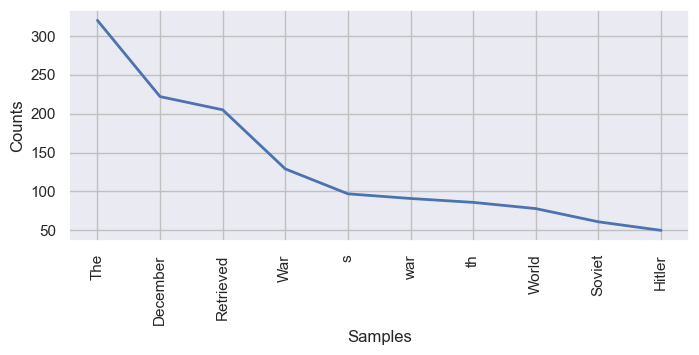

In [70]:
# plotting frequency distribution of dist_words_filter_2 from tokenized words sans_punc
# running for top 10 words to compare to original top 10 words performed earlier above

plt.figure(figsize=(8,3))
dist_words_filter_2.plot(10,cumulative=False)
plt.show()

In [71]:
dist_words_filter_2.most_common(10)

[('The', 320),
 ('December', 222),
 ('Retrieved', 205),
 ('War', 129),
 ('s', 97),
 ('war', 91),
 ('th', 86),
 ('World', 78),
 ('Soviet', 61),
 ('Hitler', 50)]

### Plot Comments of Before and After Stopwords
The inital before-stopwords graph is shown to include noteable stopwords. The graph appears to show the most common words being common stopwords like "the","of","and","to","in", and punctuation marks. While these words show to be the majority of the top 10 occuring words, they do not contribute any meaningful data to the project content. The graph shows a steep decline after these common stopwords

After filerting out stopwords, the graph begins to see more prominent words of worth to the text content. This shift in top words begins to highlight themes and key topics of the text to provide some more clarity of noteable 20th century events. With the removal, the graph begins to show words like "Hitler", World" & "War" (World War), "Soviet", and "Decemeber" taking some of the top 10 spots on the graph.

## POS Tags with TextBlob

In [72]:
# New stopwords 

new_stopwords=["The","s","th","S","ISBN","www","edit","p"]

In [73]:
filtered=[]
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [74]:
%%time
text=TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 8 ms


In [75]:
text[:1000]

TextBlob("['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchDonateAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'centuryToggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'Allied', 'offensive

In [76]:
tags_list=text.tags

In [77]:
tags_list[:20]

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP')]

In [78]:
# Creating dataframe of tag_list

df_text=pd.DataFrame(tags_list)
df_text.columns=["Words","Word Type"]

In [79]:
df_text.head()

,Words,Word Type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [80]:
# Grouping word types by their POS count through groupby function

df_t=df_text.groupby("Word Type").count().reset_index()

In [81]:
df_t.head()

,Word Type,Words
0,CC,1
1,CD,75
2,DT,12
3,EX,12
4,FW,43


In [82]:
# Setting to just see the top 10 POS results

top10_pos=df_t.nlargest(10,"Words")

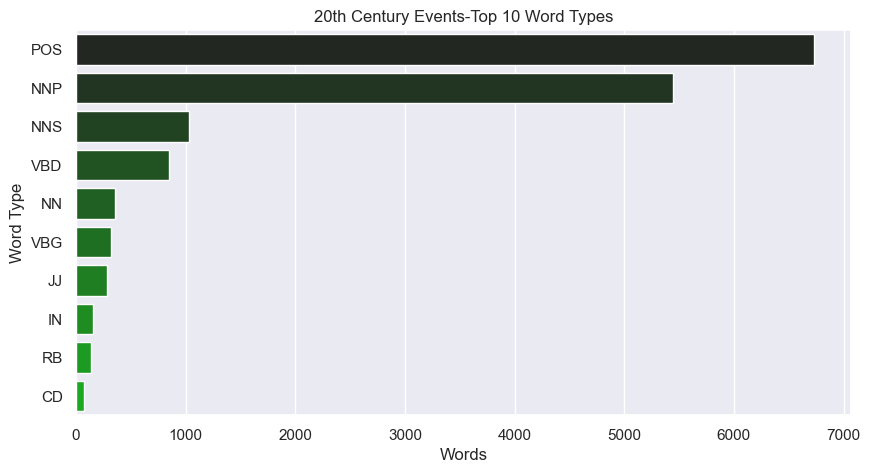

In [83]:
# Plotting bar graph of top 10 POS 

plt.figure(figsize=(10,5))
with sns.dark_palette("xkcd:green",10):
    sns.barplot(x="Words",y="Word Type",
    saturation=0.9,data=top10_pos).set_title("20th Century Events-Top 10 Word Types")

### POS Nouns Occurrence

In [84]:
# Creating dataset based on top 15 POS word types of nouns

df_nouns = df_text[df_text["Word Type"].isin(["NN", "NNS", "NNP", "NNPS"])]
df_nouns.columns = ["Words", "Occurences"]
x = df_nouns.groupby("Words").count().reset_index()
y = x.sort_values(by=["Occurences"], ascending=False)
top15_nouns = y.nlargest(15, "Occurences")

In [85]:
top15_nouns

,Words,Occurences
286,'December,222
1244,'War,129
2583,'war,91
1294,'World,78
1096,'Soviet,61
531,'Hitler,50
530,'History,41
1773,'first,38
566,'In,38
2609,'world,37


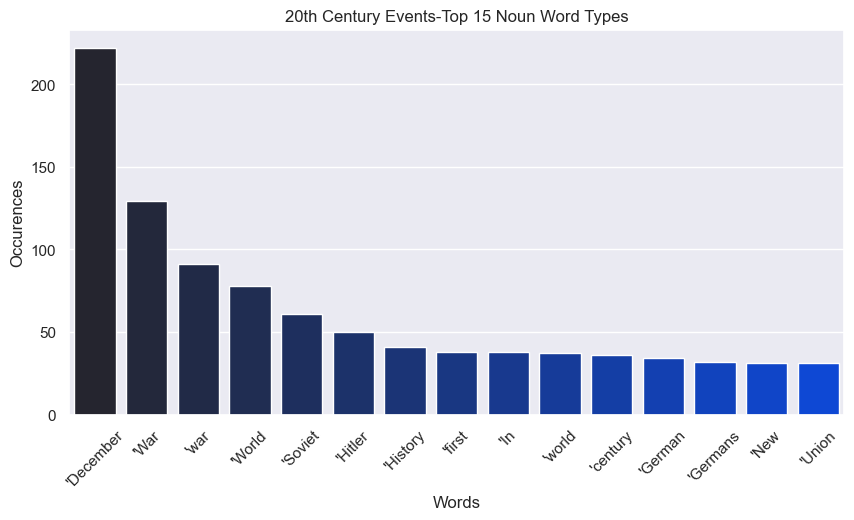

In [86]:
# Plotting bar graph of top 15 POS Nouns

plt.figure(figsize=(10,5))
with sns.dark_palette("xkcd:blue",15):
    sns.barplot(x="Words",y="Occurences",
    saturation=0.9,data=top15_nouns).set_title("20th Century Events-Top 15 Noun Word Types")
plt.xticks(rotation=45)
plt.show()

#### Comments Noun Word Types
    The graph indicates "December" as being the most commonly occurring noun with over 200 occurrences. After "Decemeber", nouns like "War", "World", "Soviet", and "Hitler" show to be prominently occurring and give light to noteable events of the 20th century like World War II and key figures during that event. Thanks to these factors appearing as prominently as they do, it helps to emphasize the text's global and historical nature. The graph, overall, indicates the text's focus on historical global conflicts, mostly World War II.

### POS Verbs Occurrence

In [87]:
# Creating dataset based on top 15 POS word types of verbs

df_verbs = df_text[df_text["Word Type"].isin(["VBD", "VBG", "VBZ", "VBN", "VBP", "VB"])]
df_verbs.columns = ["Words", "Occurences"]
x = df_verbs.groupby("Words").count().reset_index()
y = x.sort_values(by=["Occurences"], ascending=False)
top15_verbs = y.nlargest(15, "Occurences")

In [88]:
top15_verbs

,Words,Occurences
57,'Retrieved,205
78,'United,30
70,'States,26
0,'Allied,19
350,'led,15
549,'used,13
346,'launched,12
1,'Archived,10
313,'including,10
173,'controlled,9


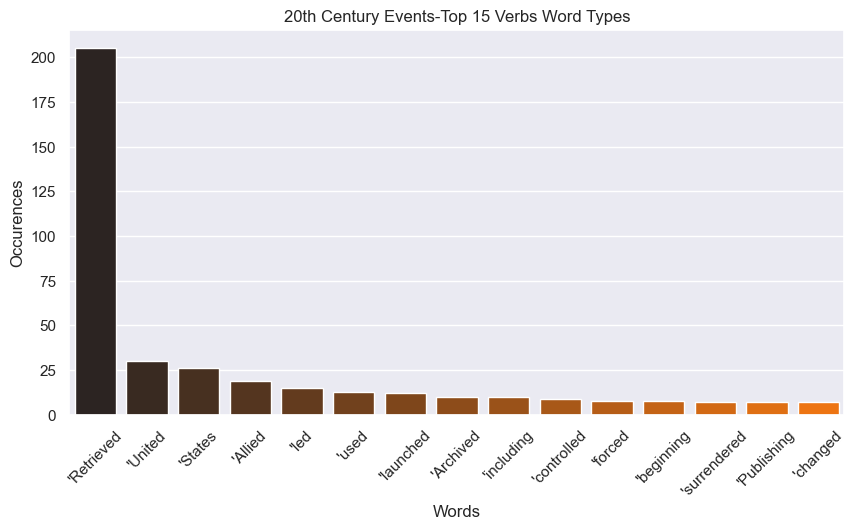

In [89]:
# Plotting bar graph of top 15 POS Verbs

plt.figure(figsize=(10,5))
with sns.dark_palette("xkcd:orange",15):
    sns.barplot(x="Words",y="Occurences",
    saturation=0.9,data=top15_verbs).set_title("20th Century Events-Top 15 Verbs Word Types")
plt.xticks(rotation=45)
plt.show()

#### Comments Verb Word Types
    The verb graph shows that "Retrieved" stands out to dominate over other verb words. Other noteable words, like "launched", "led", "surrendered", "controlled", and "forced", provide insight to the text's aggressive and war focused background of events. The verbs continue to follow the prior noun graph in that the text data showcases a major focus on global conflict events with the use of such action oriented words to describe war time activities. Another thing I noticed due to the result of the tokenization and word tagging done by python is that some words might have been misconstruted with words like "United" and "States" or "allied". While there are certain to be cases in the text that these words were used as action oriented words, I believe that the system when separating these words labeled words like "United States" and "Allied" for the Allied forces as verbs instead of nouns. 

### POS Adjective Occurrence

In [90]:
# Creating dataset based on top 15 POS word types of adjectives

df_adj = df_text[df_text["Word Type"].isin(["JJ", "JJS", "JJR"])]
df_adj.columns = ["Words", "Occurences"]
x = df_adj.groupby("Words").count().reset_index()
y = x.sort_values(by=["Occurences"], ascending=False)
top15_adj = y.nlargest(15, "Occurences")

In [91]:
top15_adj

,Words,Occurences
35,'Japanese,36
2,'American,24
5,'Atlantic,13
70,'West,10
26,'Guardian,10
129,'power,9
110,'largest,8
33,'Interest,7
19,'Chinese,7
53,'Russian,6


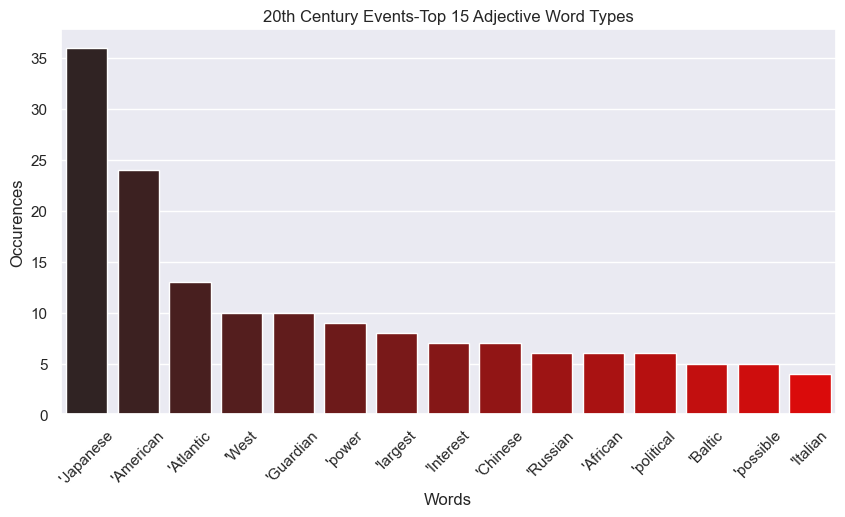

In [92]:
# Plotting bar graph of top 15 POS adjectives

plt.figure(figsize=(10,5))
with sns.dark_palette("xkcd:red",15):
    sns.barplot(x="Words",y="Occurences",
    saturation=0.9,data=top15_adj).set_title("20th Century Events-Top 15 Adjective Word Types")
plt.xticks(rotation=45)
plt.show()

#### Comments Adjective Word Types
    In the adjective graph, it can be seen that "Japanese" and "American" are the most frequently occurring, which shows the significant roles these two nations played during events in the 20th century. After that, it can be seen words like "Atlantic" and "West" appear rather frequently and show at geographic locations during the 20th century events. Further down the graph, words like "Chinese", "Russian", "African",and "politcal" which can show again the global nature of the text and its events based on the diverse groups. The graph highlights nations and location attributes to descirbe the major players and locations invovled in the events of the 20th century. 

## Country Occurences

In [118]:
# Replace multi-word country names with single tokens
listToStr = ' '.join([str(elem) for elem in filtered])
listToStr = listToStr.replace("United States", "United_States").replace("United Kingdom", "United_Kingdom")

print(listToStr[:1000])

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchDonateAppearanceCreate accountLog inPersonal tools Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events centuryToggle Historic events century subsection World beginning century war end wars World War I Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsKey events

In [94]:
# Count word occurrences in tokenized text
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [95]:
list(all_counts.items())[:25]

[('Key', 2),
 ('events', 9),
 ('century', 36),
 ('WikipediaJump', 1),
 ('contentMain', 1),
 ('menuMain', 1),
 ('menumove', 1),
 ('sidebarhide', 3),
 ('Navigation', 1),
 ('Main', 18),
 ('pageContentsCurrent', 1),
 ('eventsRandom', 1),
 ('articleAbout', 1),
 ('WikipediaContact', 1),
 ('us', 2),
 ('Contribute', 1),
 ('HelpLearn', 1),
 ('editCommunity', 1),
 ('portalRecent', 1),
 ('changesUpload', 2),
 ('fileSearchSearchDonateAppearanceCreate', 1),
 ('accountLog', 1),
 ('inPersonal', 1),
 ('tools', 1),
 ('Create', 1)]

In [96]:
# Replace tokens back to original names for matching with the CSV

all_counts_clean = {key.replace('United_States', 'United States').replace('United_Kingdom', 'United Kingdom'): value 
                    for key, value in all_counts.items()}

In [97]:
# Verify the cleaned counts

print(all_counts_clean.get('United States', 0))
print(all_counts_clean.get('United Kingdom', 0))

23
2


In [98]:
# Creating country dictionary list

countries=pd.read_csv(r"C:\Users\Drew\20th_century\countries_list_20th_century_1.5.csv",index_col=0)

In [99]:
countries.head(500)
pd.set_option('display.max_rows', None)

In [100]:
countries[:50]

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola
6,Antigua and Barbuda
7,Argentina
8,Armenia
9,Australia
10,Austria


In [101]:
# Replace names with aliases

countries['country_name'] = countries['country_name'].replace("  China, People's Republic of ","China")

In [102]:
country_list = countries['country_name'].to_list()

In [103]:
country_list[:25]

[' Afghanistan ',
 '  Albania ',
 '  Algeria ',
 '  Andorra ',
 '  Angola ',
 '  Antigua and Barbuda ',
 '  Argentina ',
 '  Armenia ',
 '  Australia ',
 '  Austria ',
 '  Azerbaijan',
 ' Bahamas, The ',
 '  Bahrain ',
 '  Bangladesh ',
 '  Barbados ',
 '  Belarus ',
 '  Belgium ',
 '  Belize ',
 '  Benin ',
 '  Bhutan ',
 '  Bolivia ',
 '  Bosnia and Herzegovina ',
 '  Botswana ',
 '  Brazil ',
 '  Brunei ']

In [104]:
# Strip any leading or trailing spaces from the 'country_name' column
countries['country'] = countries['country_name'].apply(lambda x: x.strip())

In [105]:
countries.head()

,country_name,country
1,Afghanistan,Afghanistan
2,Albania,Albania
3,Algeria,Algeria
4,Andorra,Andorra
5,Angola,Angola


In [106]:
country_list=countries['country'].to_list()

In [107]:
country_list[:25]

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei']

In [108]:
dict_of_counts = {country: all_counts_clean.get(country, 0) for country in country_list}

In [109]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 'China': 10,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 'Eswatini': 0,
 'Ethi

In [110]:
dct = {v:[k] for v,k in dict_of_counts.items()}  
df_country_count = pd.DataFrame(dct).T

In [111]:
df_country_count = df_country_count.reset_index(drop=False)
df_country_count.columns = ["Country", "Times Referenced"]


In [112]:
df_country_count.head()

,Country,Times Referenced
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1


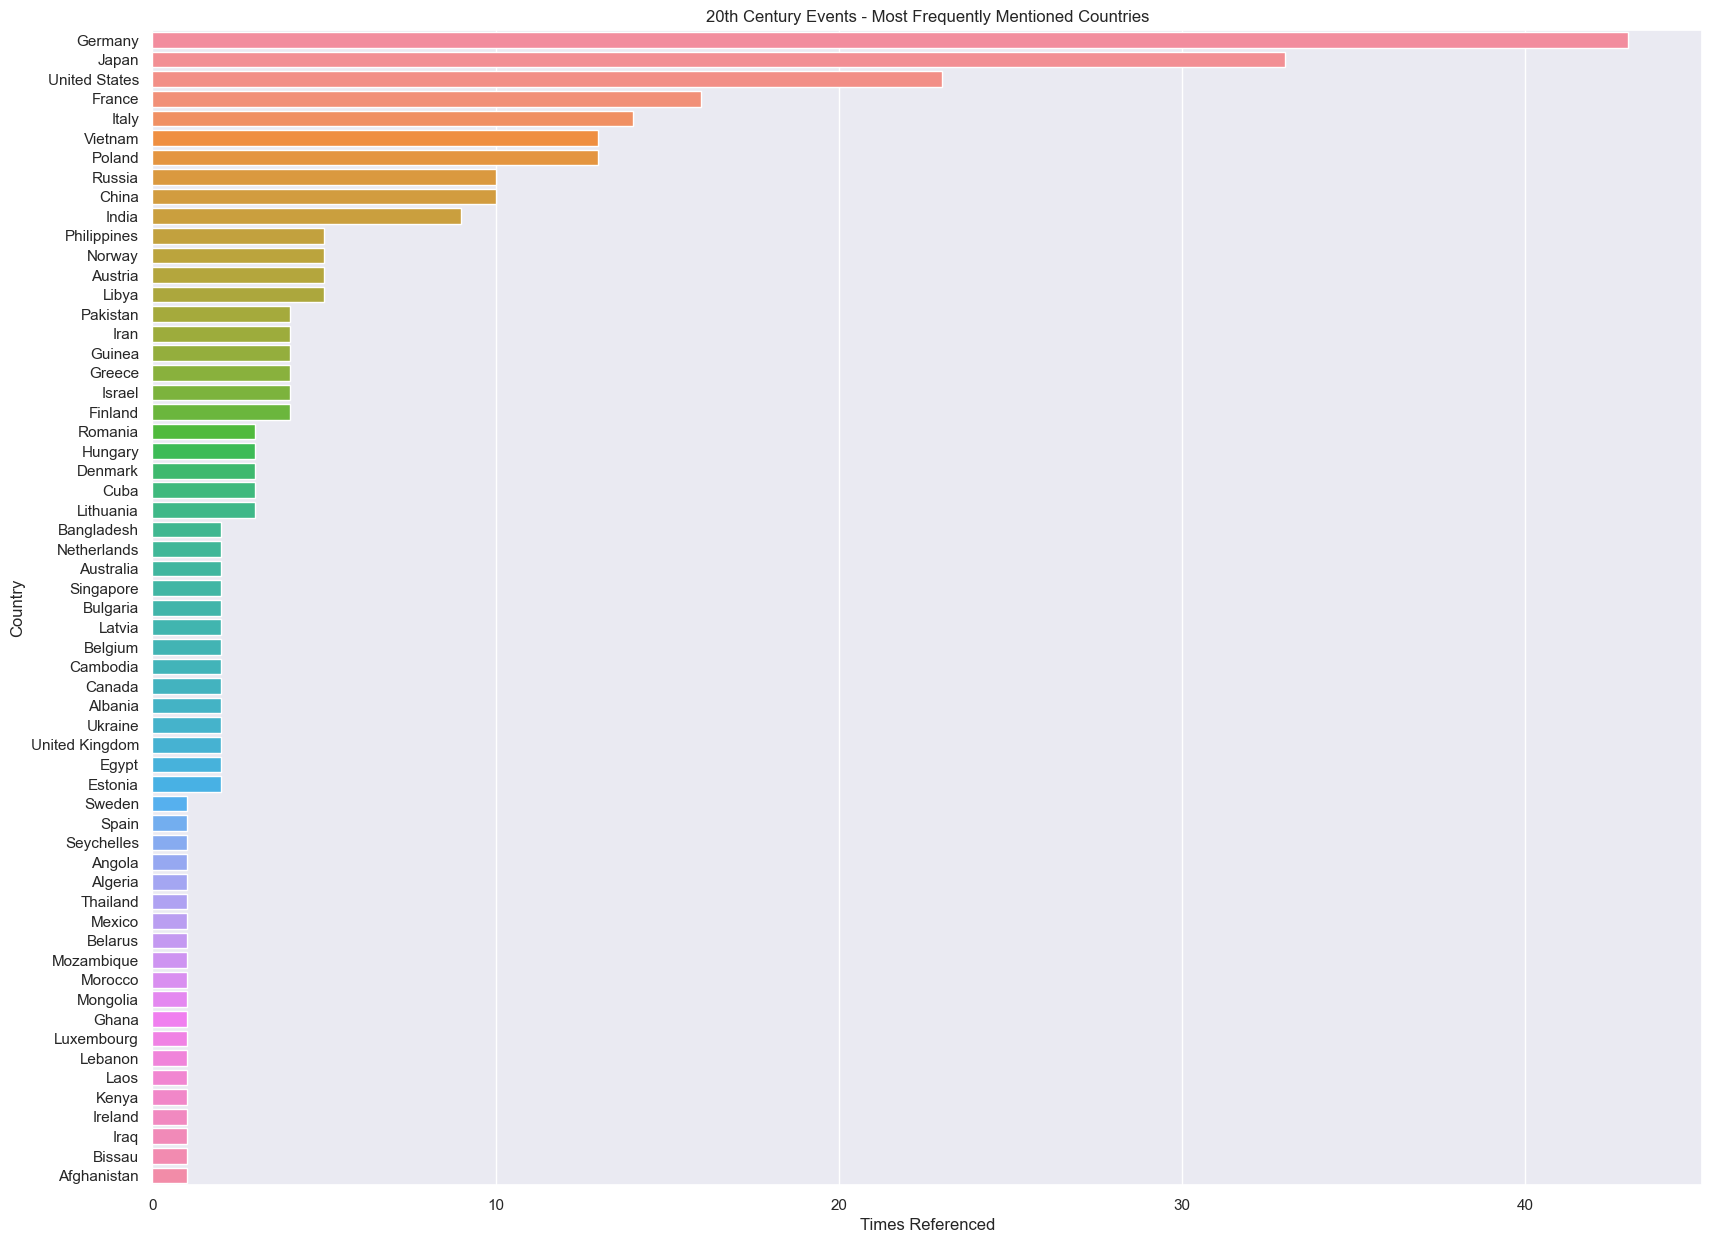

In [113]:
# Filter the DataFrame to only include countries with "Times Referenced" greater than 0
df_filtered = df_country_count[df_country_count["Times Referenced"] > 0]

# Plot the filtered data of countries mentioned more than 0 times
plt.figure(figsize=(20, 15))
with sns.dark_palette("#79C", 27):
    sns.barplot(x="Times Referenced", y="Country",
                saturation=0.9, data=df_filtered.sort_values("Times Referenced", ascending=False)).set_title("20th Century Events - Most Frequently Mentioned Countries")

#### Country Occurrence Findings
    The above graph shows the number of occurrances for those countries with references in the text, while any other country not referenced has been filtered out. Therefore, any country not in the graph has a number of 0. This approach allows the data to highlight those noteable players during the 20th century events.
    The graph shows that Germany, Japan, and the United States are the top three countries with references and can be noticed as the major players during the events of the 20th century. The graph also shows other noteable references to be France, Poland, Vietnam, Italy, Russia, and China who are also players in noteable historical events around these times like World Wars, Cold War, and the Vietnam War.  

## Sentiment Analysis-Bonus Task

Expectation: I expect the sentiment analysis to show a more negative side. since the text appeared to pertain mostly on war events. I expect the test to result in a more objective or factual basis.


In [114]:
text_sent=TextBlob(str(filtered))
print(text_sent.sentiment)

Sentiment(polarity=0.04912987934051757, subjectivity=0.3542921312729818)


Sentiment Test Result: 
Based on the rest results, it appears that the test ran a polarity of 0.049 and a subjectivity score of 0.354. From this, it can be seen that the text is more objective and fact based than subjective or opinionated. As this text is based on historical events of the 20th century, I believe this aligns. HOwever, what surpised me and what resulted differently than my expectation is that the text shows to be near neutral polarity but with a slight hint of postitive sentiment being at 0.049. As most of the text appeared to be conerning war events, I believed it to be on a more saddened note as a reult of war casualities.

In [115]:
sentiment_df=pd.DataFrame({'Score':['Polarity','Subjectivity'],
                           'Value':[text_sent.sentiment.polarity,text_sent.sentiment.subjectivity]})

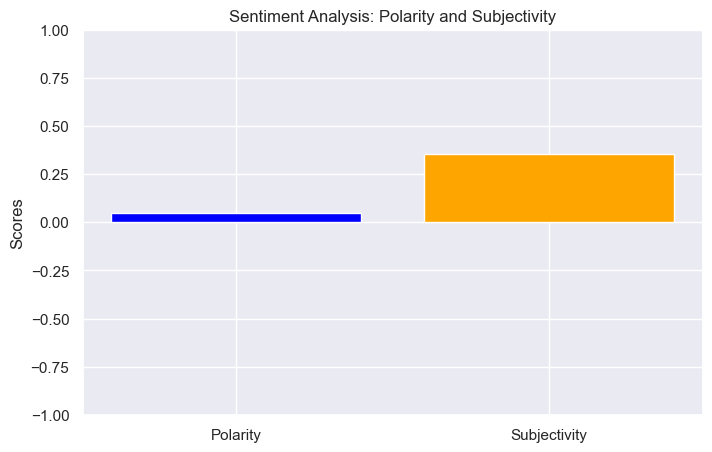

In [116]:
# Creating Bar Plot of sentiment scores

plt.figure(figsize=(8,5))
plt.bar(sentiment_df['Score'],sentiment_df['Value'],color=['blue','orange'])
plt.title('Sentiment Analysis: Polarity and Subjectivity')
plt.ylabel('Scores')
plt.ylim(-1,1) # Scores for polarity range from -1 to 1, and subjectivity ranges from 0 to 1
plt.show()

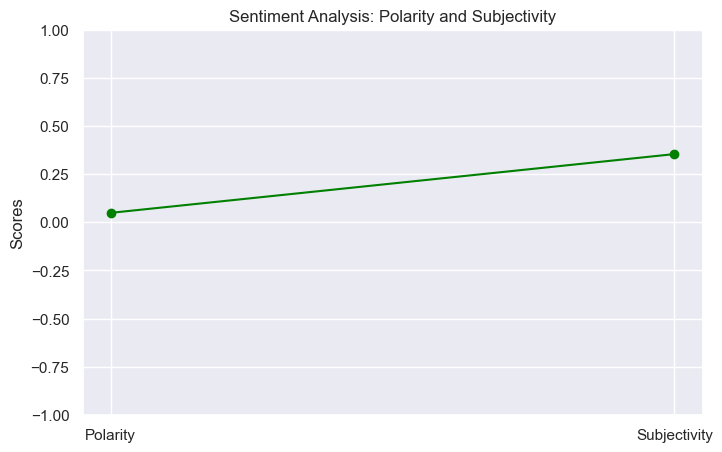

In [117]:
# Creating line plot for sentiment scores

plt.figure(figsize=(8,5))
plt.plot(sentiment_df['Score'],sentiment_df['Value'],marker='o',color='green')
plt.title('Sentiment Analysis: Polarity and Subjectivity')
plt.ylabel('Scores')
plt.ylim(-1,1) # Scores for polarity range from -1 to 1, and subjectivity ranges from 0 to 1
plt.show()